In [ ]:
import numpy as np
import pandas as pd

In [ ]:
data = pd.read_excel('data_v7.xlsx')

In [ ]:
data.head()

,Unnamed: 0,locations_month,maxtempC,mintempC,avgtempC,sunHour,uvIndex,humidity,visibility,visibilityMiles,...,cloudcover,HeatIndexC,DewPointC,WindChillC,FeelsLikeC,rainFall,rainDays,date,locations,label
0,0,barisal2015-1,26.0,17.0,21.0,8.70,6.0,53.0,10.0,6.0,...,1.5,24.0,13.0,23.0,23.0,10.17,3.0,2015-1,barisal,0
1,1,barisal2015-2,28.0,19.0,23.0,8.70,6.0,55.5,10.0,6.0,...,9.5,26.0,14.0,25.0,26.0,2.26,3.0,2015-2,barisal,0
2,2,barisal2015-3,33.0,22.0,27.0,11.60,7.0,50.5,10.0,6.0,...,13.0,30.0,16.0,29.0,30.0,4.83,14.0,2015-3,barisal,0
3,3,barisal2015-4,33.0,26.5,29.0,12.75,7.0,67.5,10.0,6.0,...,31.5,34.0,23.0,30.0,34.0,44.09,16.0,2015-4,barisal,0
4,4,barisal2015-5,35.0,28.0,31.0,13.10,8.0,69.5,10.0,6.0,...,37.5,38.0,25.0,32.0,38.0,20.35,15.0,2015-5,barisal,0


In [ ]:
len(data[data.isnull().any(axis=1)])

0

In [ ]:
data.drop(['Unnamed: 0','locations_month','label','date'],axis=1,inplace=True)

In [ ]:
data.drop(['pressureInches','visibility'],axis=1,inplace=True)

In [ ]:
data.head()

,maxtempC,mintempC,avgtempC,sunHour,uvIndex,humidity,visibilityMiles,pressure,cloudcover,HeatIndexC,DewPointC,WindChillC,FeelsLikeC,rainFall,rainDays,locations
0,26.0,17.0,21.0,8.70,6.0,53.0,6.0,1015.0,1.5,24.0,13.0,23.0,23.0,10.17,3.0,barisal
1,28.0,19.0,23.0,8.70,6.0,55.5,6.0,1013.5,9.5,26.0,14.0,25.0,26.0,2.26,3.0,barisal
2,33.0,22.0,27.0,11.60,7.0,50.5,6.0,1011.0,13.0,30.0,16.0,29.0,30.0,4.83,14.0,barisal
3,33.0,26.5,29.0,12.75,7.0,67.5,6.0,1008.0,31.5,34.0,23.0,30.0,34.0,44.09,16.0,barisal
4,35.0,28.0,31.0,13.10,8.0,69.5,6.0,1005.0,37.5,38.0,25.0,32.0,38.0,20.35,15.0,barisal


In [ ]:
loc_lst = list(data['locations'].unique())

i = 0
for haha in loc_lst:
    
    data.loc[data.locations == haha, 'locations'] = i
    i+=1

In [ ]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import MinMaxScaler

In [ ]:
data.corr()

,maxtempC,mintempC,avgtempC,sunHour,uvIndex,humidity,visibilityMiles,pressure,cloudcover,HeatIndexC,DewPointC,WindChillC,FeelsLikeC,rainFall,rainDays,locations
maxtempC,1.000000,0.797501,0.909098,0.774211,0.821890,0.205025,-0.164733,-0.674420,0.490268,0.808328,0.559769,0.910055,0.816631,0.268291,0.531454,0.053065
mintempC,0.797501,1.000000,0.954623,0.785732,0.795536,0.568866,-0.311691,-0.875864,0.745291,0.971363,0.855579,0.930556,0.972693,0.444601,0.724013,-0.098490
avgtempC,0.909098,0.954623,1.000000,0.778998,0.838613,0.402897,-0.246397,-0.811171,0.673871,0.929708,0.738929,0.954945,0.934225,0.424528,0.669351,-0.045289
sunHour,0.774211,0.785732,0.778998,1.000000,0.729958,0.411355,-0.232959,-0.736360,0.511181,0.793423,0.656132,0.791034,0.796918,0.176593,0.613974,-0.026310
uvIndex,0.821890,0.795536,0.838613,0.729958,1.000000,0.213123,-0.026906,-0.609243,0.367579,0.780755,0.567798,0.853297,0.783358,0.159381,0.465248,-0.064029
humidity,0.205025,0.568866,0.402897,0.411355,0.213123,1.000000,-0.592411,-0.636538,0.740321,0.600097,0.886743,0.365065,0.593601,0.477358,0.634772,-0.104425
visibilityMiles,-0.164733,-0.311691,-0.246397,-0.232959,-0.026906,-0.592411,1.000000,0.451349,-0.658623,-0.317739,-0.464525,-0.169855,-0.316769,-0.572457,-0.545801,-0.019238
pressure,-0.674420,-0.875864,-0.811171,-0.736360,-0.609243,-0.636538,0.451349,1.000000,-0.832867,-0.902136,-0.824570,-0.792339,-0.900993,-0.502659,-0.762050,-0.013927
cloudcover,0.490268,0.745291,0.673871,0.511181,0.367579,0.740321,-0.658623,-0.832867,1.000000,0.735995,0.781837,0.575432,0.734762,0.703806,0.785223,0.004089
HeatIndexC,0.808328,0.971363,0.929708,0.793423,0.780755,0.600097,-0.317739,-0.902136,0.735995,1.000000,0.883386,0.941055,0.998681,0.425756,0.718329,-0.070189


In [ ]:
import matplotlib.pyplot as plt

In [ ]:
scaler = MinMaxScaler(feature_range=[0, 1])
data_rescaled = scaler.fit_transform(data)

In [ ]:
large = 22; med = 16; small = 12
params = {'axes.titlesize': large,
          'legend.fontsize': med,
          'figure.figsize': (16, 10),
          'axes.labelsize': med,
          'axes.titlesize': med,
          'xtick.labelsize': med,
          'ytick.labelsize': med,
          'figure.titlesize': large}
plt.rcParams.update(params)
plt.style.use('seaborn-darkgrid')
%matplotlib inline

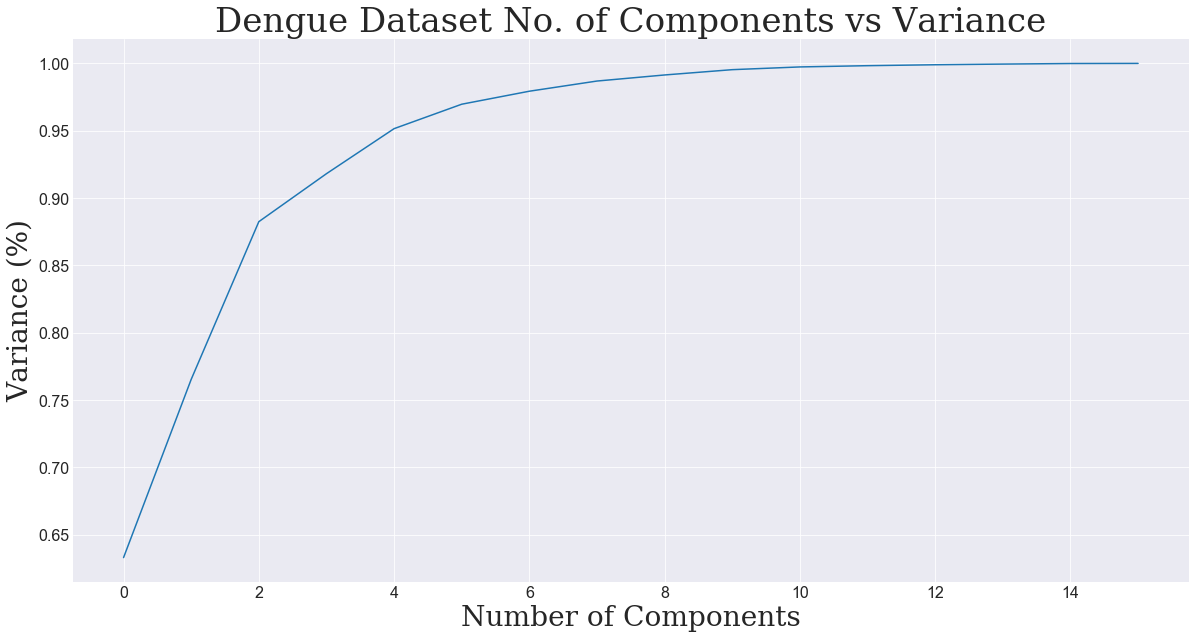

<Figure size 432x288 with 0 Axes>

In [ ]:
pca = PCA().fit(data_rescaled)
plt.figure(figsize=(20,10))
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('Number of Components',fontdict={'family': 'serif','weight': 'normal','size': 28})
plt.ylabel('Variance (%)' , fontdict={'family': 'serif','weight': 'normal','size': 28}) #for each component
plt.title('Dengue Dataset No. of Components vs Variance' , fontdict={'family': 'serif','weight': 'normal','size': 34})
plt.show()

plt.savefig('destination_path.eps', format='eps')

In [ ]:
np.cumsum(pca.explained_variance_ratio_)

array([0.63302988, 0.76535782, 0.882474  , 0.91810669, 0.95155339,
       0.96969941, 0.97935335, 0.98691043, 0.99141932, 0.99535534,
       0.9973854 , 0.99831264, 0.99899793, 0.99949722, 0.99992221,
       1.        ])

In [ ]:
pca = PCA(n_components=8)
data_pca = pca.fit_transform(data_rescaled)

In [3]:
import numpy as np
a = np.array([1, 2, 3, 4, 5, 6])

In [5]:
a[a > 2]

array([3, 4, 5, 6])

In [ ]:
labels = pd.read_excel('data_v7.xlsx',usecols=['label'])

In [ ]:
data_pca.shape

(2562, 8)

In [ ]:
labels_pca = np.array(labels)

In [ ]:
labels_pca.shape

(2562, 1)

In [ ]:
X,y = data_pca,labels_pca

In [ ]:
temp = pd.read_excel('additional.xlsx')

In [ ]:
temp.head()

,locations_month,maxtempC,mintempC,avgtempC,sunHour,uvIndex,humidity,visibility,pressure,cloudcover,WindChillC,rainFall,rainDays,date,locations,locations.1
0,maulvi bazar2019-9,31,23,28,147.0,7,86,8.3,1007.3,67,10.1,295.3,30,2019-9,NaN,NaN
1,maulvi bazar2019-8,33,25,30,193.0,5,86,7.5,1002.2,69,11.8,511.4,30,2019-8,NaN,NaN
2,Netrokona,31,24,29,150.0,5,50,8.8,1005.3,62,16.1,381.4,29,2019-9,Netrokona,Netrokona
3,Netrokona,34,31,27,178.5,7,77,9.0,1000.0,70,19.1,367.7,30,2019-8,Netrokona,Netrokona
4,Jhenai,31,25,29,120.5,5,80,8.5,1004.7,69,17.6,634.1,29,2019-9,Jhenai,Jhenai


In [ ]:
temp.drop(['locations_month','locations.1','locations','date','visibility'],axis=1,inplace=True)

In [ ]:
temp.head()

,maxtempC,mintempC,avgtempC,sunHour,uvIndex,humidity,pressure,cloudcover,WindChillC,rainFall,rainDays
0,31,23,28,147.0,7,86,1007.3,67,10.1,295.3,30
1,33,25,30,193.0,5,86,1002.2,69,11.8,511.4,30
2,31,24,29,150.0,5,50,1005.3,62,16.1,381.4,29
3,34,31,27,178.5,7,77,1000.0,70,19.1,367.7,30
4,31,25,29,120.5,5,80,1004.7,69,17.6,634.1,29


In [ ]:
scaler = MinMaxScaler(feature_range=[0, 1])
temp_rescaled = scaler.fit_transform(temp)

In [ ]:
pca = PCA().fit(temp_rescaled)
plt.figure(figsize=(20,10))
np.cumsum(pca.explained_variance_ratio_)

array([0.46752916, 0.65995111, 0.81144537, 0.87628541, 0.93084475,
       0.96345972, 0.98784346, 0.99700812, 0.99947906, 0.99999197,
       1.        ])

<Figure size 1440x720 with 0 Axes>

In [ ]:
from imblearn.over_sampling import RandomOverSampler
ros = RandomOverSampler(random_state=0)
X_resampled, y_resampled = ros.fit_resample(X, y)

Using TensorFlow backend.
c:\users\alvir\deelearning\lib\site-packages\sklearn\utils\validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [ ]:
X,y = X_resampled,y_resampled

In [ ]:
X.shape

(4730, 8)

In [ ]:
y.shape

(4730,)

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=101)

In [ ]:
from sklearn.linear_model import LogisticRegression

In [ ]:
lr = LogisticRegression()

In [ ]:
lr.fit(X_train,y_train)

c:\users\alvir\deelearning\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

In [ ]:
lr_pred_test = lr.predict(X_test)

In [ ]:
lr_pred_train = lr.predict(X_train)

In [ ]:
from sklearn.metrics import classification_report

In [ ]:
print(classification_report(lr_pred_test,y_test))

              precision    recall  f1-score   support

           0       0.85      0.76      0.80       805
           1       0.72      0.82      0.77       614

    accuracy                           0.79      1419
   macro avg       0.79      0.79      0.79      1419
weighted avg       0.79      0.79      0.79      1419



In [ ]:
print(classification_report(lr_pred_train,y_train))

              precision    recall  f1-score   support

           0       0.86      0.75      0.80      1896
           1       0.71      0.84      0.77      1415

    accuracy                           0.78      3311
   macro avg       0.78      0.79      0.78      3311
weighted avg       0.80      0.78      0.79      3311



In [ ]:
from sklearn.metrics import confusion_matrix

In [ ]:
print(confusion_matrix(y_test,lr_pred_test))

[[611 109]
 [194 505]]


In [ ]:
print(confusion_matrix(y_train,lr_pred_train))

[[1413  232]
 [ 483 1183]]


In [ ]:
from sklearn.model_selection import GridSearchCV , RandomizedSearchCV

In [ ]:
from sklearn.linear_model import LogisticRegression

In [ ]:
from sklearn.pipeline import Pipeline

In [ ]:


param_grid ={'penalty' : ['l1', 'l2'],
    'C' : np.logspace(-4, 4, 20),
    'solver' : ['liblinear']}

# Create grid search object

clf = GridSearchCV(estimator=LogisticRegression() , param_grid = param_grid, cv = 5, verbose=True, n_jobs=-1)

# Fit on data

best_clf = clf.fit(X_train, y_train)

Fitting 5 folds for each of 40 candidates, totalling 200 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  88 tasks      | elapsed:    1.2s
[Parallel(n_jobs=-1)]: Done 200 out of 200 | elapsed:    1.3s finished


In [ ]:
tuned_lr_pred_test = best_clf.predict(X_test)

In [ ]:
tuned_lr_pred_train = best_clf.predict(X_train)

In [ ]:
print(classification_report(y_test,tuned_lr_pred_test))

              precision    recall  f1-score   support

           0       0.75      0.85      0.80       720
           1       0.82      0.72      0.76       699

    accuracy                           0.78      1419
   macro avg       0.79      0.78      0.78      1419
weighted avg       0.79      0.78      0.78      1419



In [ ]:
print(classification_report(y_train,tuned_lr_pred_train))

              precision    recall  f1-score   support

           0       0.75      0.86      0.80      1645
           1       0.83      0.71      0.77      1666

    accuracy                           0.78      3311
   macro avg       0.79      0.78      0.78      3311
weighted avg       0.79      0.78      0.78      3311



In [ ]:
print(confusion_matrix(y_test,tuned_lr_pred_test))

[[611 109]
 [199 500]]


In [ ]:
print(confusion_matrix(y_train,tuned_lr_pred_train))

[[1410  235]
 [ 479 1187]]


In [ ]:
from sklearn.ensemble import RandomForestClassifier

In [ ]:
rfc = RandomForestClassifier()

In [ ]:
rfc.fit(X_train,y_train)

c:\users\alvir\deelearning\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=None, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=10,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [ ]:
rfc_pred_train = rfc.predict(X_train)

In [ ]:
rfc_pred_test = rfc.predict(X_test)

In [ ]:
print(classification_report(rfc_pred_test,y_test))

              precision    recall  f1-score   support

           0       0.98      1.00      0.99       707
           1       1.00      0.98      0.99       712

    accuracy                           0.99      1419
   macro avg       0.99      0.99      0.99      1419
weighted avg       0.99      0.99      0.99      1419



In [ ]:
print(classification_report(rfc_pred_train,y_train))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      1645
           1       1.00      1.00      1.00      1666

    accuracy                           1.00      3311
   macro avg       1.00      1.00      1.00      3311
weighted avg       1.00      1.00      1.00      3311



In [ ]:
print(confusion_matrix(rfc_pred_test,y_test))

[[707   0]
 [ 13 699]]


In [ ]:
print(confusion_matrix(rfc_pred_train,y_train))

[[1645    0]
 [   0 1666]]


In [ ]:
df = pd.DataFrame(X_train,columns=['c1','c2','c3','c4','c5','c6','c7','c8'])

In [ ]:
df_y = pd.DataFrame(y_train,columns=['y'])

In [ ]:
rfc.estimators_[5]

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
                       max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=542078391, splitter='best')

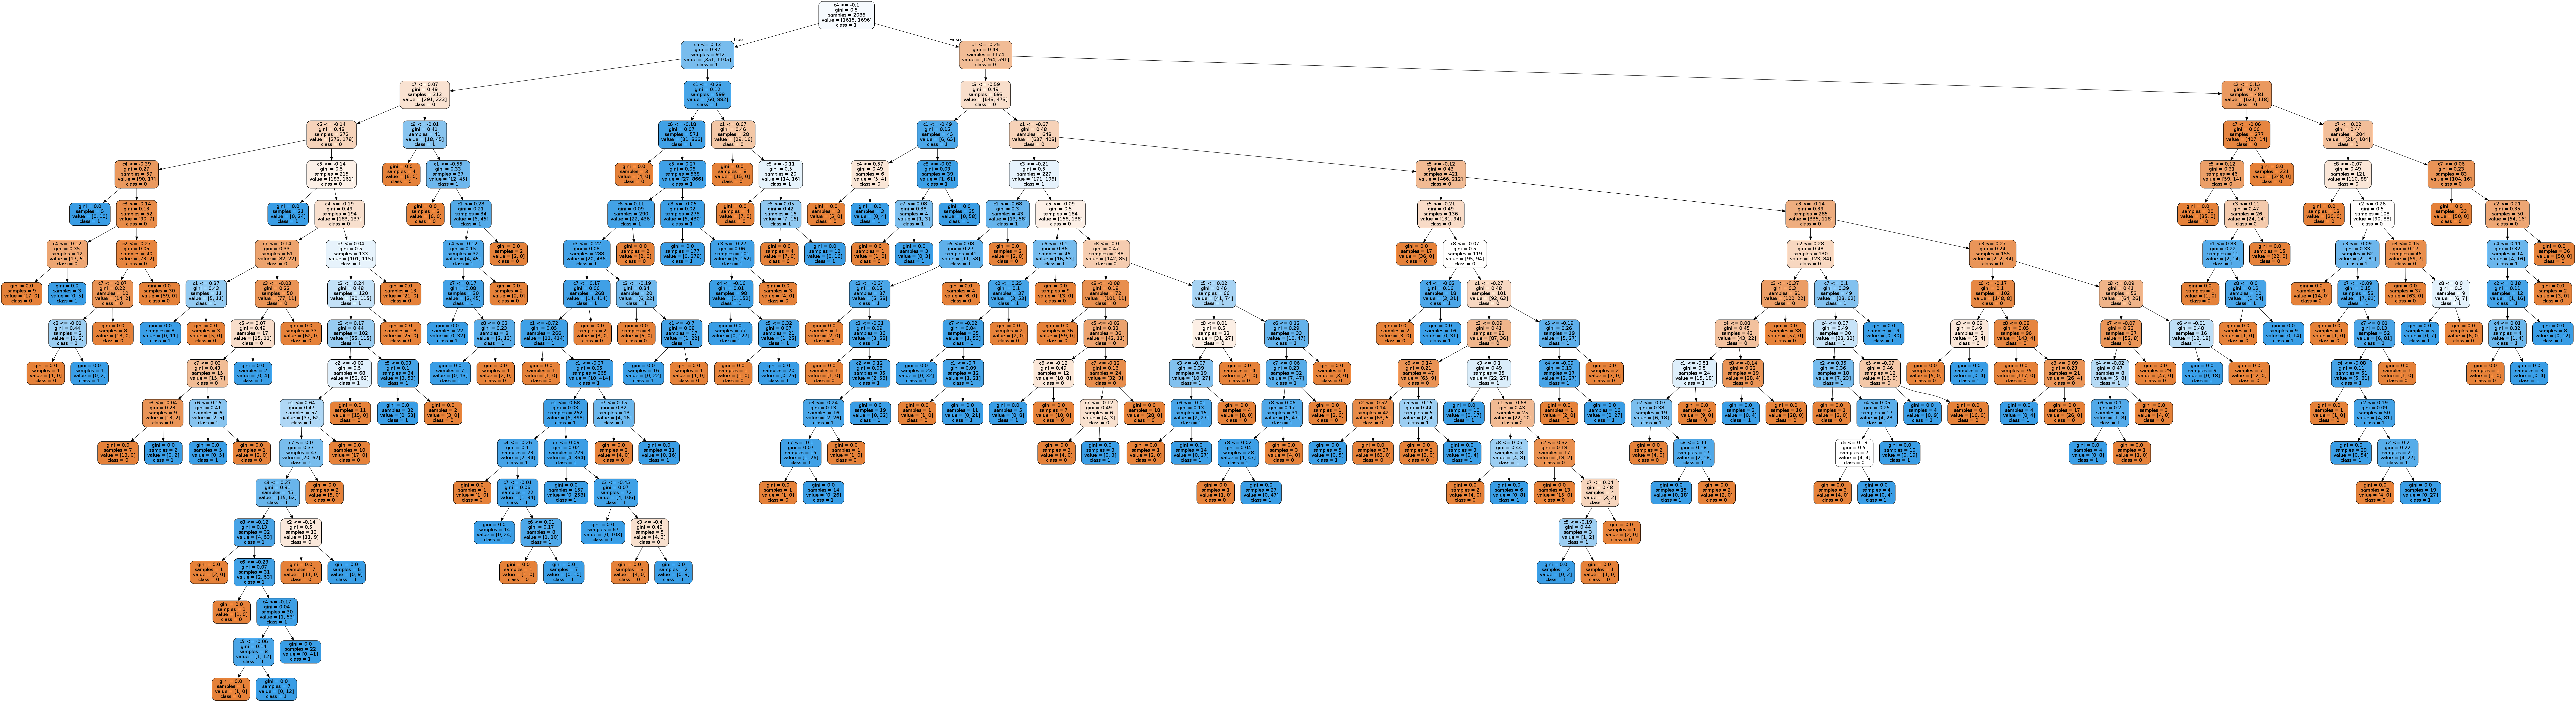

In [ ]:
from sklearn.ensemble import RandomForestClassifier
model = RandomForestClassifier(n_estimators=10)
from os import system

# Train
model.fit(X_train, y_train)
# Extract single tree
estimator = model.estimators_[5]

from sklearn.tree import export_graphviz
# Export as dot file
export_graphviz(estimator, out_file='tree.dot', 
                feature_names = df.columns,
                class_names = ['0','1'],
                rounded = True, proportion = False, 
                precision = 2, filled = True)

# Convert to png using system command (requires Graphviz)
#from subprocess import call
#call(['dot', '-Tpng', 'tree.dot', '-o', 'tree.png', '-Gdpi=600'])

# Display in jupyter notebook
from IPython.display import Image
Image(filename = 'tree.png')

In [ ]:
param_grid = { 
    'n_estimators': [200, 500],
    'max_features': ['auto', 'sqrt', 'log2'],
    'max_depth' : [4,5,6,7,8],
    'criterion' :['gini', 'entropy']
}

In [ ]:
CV_rfc = GridSearchCV(estimator=rfc, param_grid=param_grid, cv= 3)
CV_rfc.fit(X_train, y_train)

GridSearchCV(cv=3, error_score='raise-deprecating',
             estimator=RandomForestClassifier(bootstrap=True, class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features='auto',
                                              max_leaf_nodes=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              n_estimators=10, n_jobs=None,
                                              oob_score=False,
                                              random_state=None, verbose=0,
                                              warm_start=False),
             iid='wa

In [ ]:
CV_rfc.best_params_

{'criterion': 'entropy',
 'max_depth': 8,
 'max_features': 'log2',
 'n_estimators': 500}

In [ ]:
tuned_rfc=RandomForestClassifier(random_state=101, max_features='log2', n_estimators= 500, max_depth=8, criterion='entropy')

In [ ]:
tuned_rfc.fit(X_train,y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='entropy',
                       max_depth=8, max_features='log2', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=500,
                       n_jobs=None, oob_score=False, random_state=101,
                       verbose=0, warm_start=False)

In [ ]:
tuned_rfc_pred_test = tuned_rfc.predict(X_test)

In [ ]:
tuned_rfc_pred_train = tuned_rfc.predict(X_train)

In [ ]:
print(classification_report(tuned_rfc_pred_test,y_test))

              precision    recall  f1-score   support

           0       0.97      0.99      0.98       704
           1       0.99      0.97      0.98       715

    accuracy                           0.98      1419
   macro avg       0.98      0.98      0.98      1419
weighted avg       0.98      0.98      0.98      1419



In [ ]:
print(classification_report(tuned_rfc_pred_train,y_train))

              precision    recall  f1-score   support

           0       0.99      1.00      0.99      1629
           1       1.00      0.99      0.99      1682

    accuracy                           0.99      3311
   macro avg       0.99      0.99      0.99      3311
weighted avg       0.99      0.99      0.99      3311



In [ ]:
print(confusion_matrix(tuned_rfc_pred_train,y_train))

[[1623    6]
 [  22 1660]]


In [ ]:
print(confusion_matrix(tuned_rfc_pred_test,y_test))

[[700   4]
 [ 20 695]]


In [ ]:
from sklearn.svm import SVC

In [ ]:
svc = SVC()

In [ ]:
svc.fit(X_train,y_train)

c:\users\alvir\deelearning\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
    kernel='rbf', max_iter=-1, probability=False, random_state=None,
    shrinking=True, tol=0.001, verbose=False)

In [ ]:
svc_pred_train = svc.predict(X_train)

In [ ]:
svc_pred_test = svc.predict(X_test)

In [ ]:
print(classification_report(svc_pred_test,y_test))

              precision    recall  f1-score   support

           0       0.92      0.72      0.81       912
           1       0.64      0.88      0.74       507

    accuracy                           0.78      1419
   macro avg       0.78      0.80      0.78      1419
weighted avg       0.82      0.78      0.78      1419



In [ ]:
print(classification_report(svc_pred_train,y_train))

              precision    recall  f1-score   support

           0       0.93      0.71      0.81      2146
           1       0.63      0.90      0.74      1165

    accuracy                           0.78      3311
   macro avg       0.78      0.81      0.77      3311
weighted avg       0.82      0.78      0.78      3311



In [ ]:
print(confusion_matrix(svc_pred_test,y_test))

[[660 252]
 [ 60 447]]


In [ ]:
print(confusion_matrix(svc_pred_train,y_train))

[[1527  619]
 [ 118 1047]]


In [ ]:
param_grid = {'C':[0.1,1,10,100,1000],'gamma':[10,1,0.1,0.001,0.0001], 'kernel':['linear','rbf']}

In [ ]:
grid = GridSearchCV(SVC(),param_grid,refit = True, verbose=2)

In [ ]:
grid.fit(X_train,y_train)

c:\users\alvir\deelearning\lib\site-packages\sklearn\model_selection\_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s


Fitting 3 folds for each of 50 candidates, totalling 150 fits
[CV] C=0.1, gamma=10, kernel=linear ..................................
[CV] ................... C=0.1, gamma=10, kernel=linear, total=   0.1s
[CV] C=0.1, gamma=10, kernel=linear ..................................
[CV] ................... C=0.1, gamma=10, kernel=linear, total=   0.1s
[CV] C=0.1, gamma=10, kernel=linear ..................................
[CV] ................... C=0.1, gamma=10, kernel=linear, total=   0.1s
[CV] C=0.1, gamma=10, kernel=rbf .....................................
[CV] ...................... C=0.1, gamma=10, kernel=rbf, total=   0.1s
[CV] C=0.1, gamma=10, kernel=rbf .....................................
[CV] ...................... C=0.1, gamma=10, kernel=rbf, total=   0.1s
[CV] C=0.1, gamma=10, kernel=rbf .....................................
[CV] ...................... C=0.1, gamma=10, kernel=rbf, total=   0.1s
[CV] C=0.1, gamma=1, kernel=linear ...................................
[CV] ..........

[CV] .................... C=1, gamma=0.0001, kernel=rbf, total=   0.2s
[CV] C=1, gamma=0.0001, kernel=rbf ...................................
[CV] .................... C=1, gamma=0.0001, kernel=rbf, total=   0.2s
[CV] C=1, gamma=0.0001, kernel=rbf ...................................
[CV] .................... C=1, gamma=0.0001, kernel=rbf, total=   0.2s
[CV] C=10, gamma=10, kernel=linear ...................................
[CV] .................... C=10, gamma=10, kernel=linear, total=   0.1s
[CV] C=10, gamma=10, kernel=linear ...................................
[CV] .................... C=10, gamma=10, kernel=linear, total=   0.1s
[CV] C=10, gamma=10, kernel=linear ...................................
[CV] .................... C=10, gamma=10, kernel=linear, total=   0.1s
[CV] C=10, gamma=10, kernel=rbf ......................................
[CV] ....................... C=10, gamma=10, kernel=rbf, total=   0.1s
[CV] C=10, gamma=10, kernel=rbf ......................................
[CV] .

[CV] ............... C=100, gamma=0.0001, kernel=linear, total=   0.3s
[CV] C=100, gamma=0.0001, kernel=linear ..............................
[CV] ............... C=100, gamma=0.0001, kernel=linear, total=   0.3s
[CV] C=100, gamma=0.0001, kernel=rbf .................................
[CV] .................. C=100, gamma=0.0001, kernel=rbf, total=   0.1s
[CV] C=100, gamma=0.0001, kernel=rbf .................................
[CV] .................. C=100, gamma=0.0001, kernel=rbf, total=   0.1s
[CV] C=100, gamma=0.0001, kernel=rbf .................................
[CV] .................. C=100, gamma=0.0001, kernel=rbf, total=   0.1s
[CV] C=1000, gamma=10, kernel=linear .................................
[CV] .................. C=1000, gamma=10, kernel=linear, total=   1.5s
[CV] C=1000, gamma=10, kernel=linear .................................
[CV] .................. C=1000, gamma=10, kernel=linear, total=   1.6s
[CV] C=1000, gamma=10, kernel=linear .................................
[CV] .

[Parallel(n_jobs=1)]: Done 150 out of 150 | elapsed:   42.2s finished


GridSearchCV(cv='warn', error_score='raise-deprecating',
             estimator=SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
                           decision_function_shape='ovr', degree=3,
                           gamma='auto_deprecated', kernel='rbf', max_iter=-1,
                           probability=False, random_state=None, shrinking=True,
                           tol=0.001, verbose=False),
             iid='warn', n_jobs=None,
             param_grid={'C': [0.1, 1, 10, 100, 1000],
                         'gamma': [10, 1, 0.1, 0.001, 0.0001],
                         'kernel': ['linear', 'rbf']},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None, verbose=2)

In [ ]:
grid.best_params_

{'C': 100, 'gamma': 10, 'kernel': 'rbf'}

In [ ]:
SVC(C=100,gamma = 10).fit(X_train,y_train)

SVC(C=100, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma=10, kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [ ]:
tuned_svc_pred_test = grid.predict(X_test)

In [ ]:
tuned_svc_pred_train = grid.predict(X_train)

In [ ]:
print(classification_report(tuned_svc_pred_train,y_train))

              precision    recall  f1-score   support

           0       0.99      1.00      1.00      1631
           1       1.00      0.99      1.00      1680

    accuracy                           1.00      3311
   macro avg       1.00      1.00      1.00      3311
weighted avg       1.00      1.00      1.00      3311



In [ ]:
print(classification_report(tuned_svc_pred_test,y_test))

              precision    recall  f1-score   support

           0       0.95      1.00      0.98       686
           1       1.00      0.95      0.98       733

    accuracy                           0.98      1419
   macro avg       0.98      0.98      0.98      1419
weighted avg       0.98      0.98      0.98      1419



In [ ]:
pca = PCA(n_components=2)
two_pca = pca.fit_transform(X_train)

In [ ]:
df = pd.DataFrame(two_pca,columns = ['c1','c2'])

In [ ]:
from sklearn.svm import SVC 
model = SVC(C=100,gamma = 10,kernel='linear')
model.fit(df, df_y)

c:\users\alvir\deelearning\lib\site-packages\sklearn\utils\validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


SVC(C=100, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma=10, kernel='linear',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [ ]:
model.support_vectors_

array([[-0.36665428, -0.11724114],
       [ 0.93542062, -0.24948837],
       [-0.03611964,  0.26789087],
       ...,
       [-0.10278933,  0.17368359],
       [-0.19812432, -0.05657879],
       [-0.52105288, -0.16031431]])

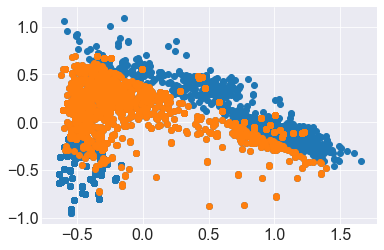

In [ ]:
plt.scatter(df.iloc[:, 0], df.iloc[:, 1], cmap='autumn')
plt.scatter(model.support_vectors_[:,0],model.support_vectors_[:,1])

In [ ]:
X = df
y = df_y['y'] 

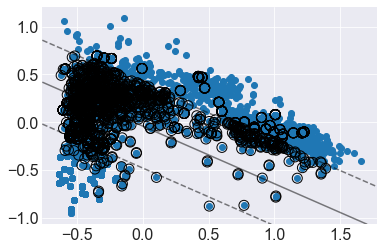

In [ ]:
ax = plt.gca()
plt.scatter(X.iloc[:, 0], X.iloc[:, 1], cmap='autumn')
xlim = ax.get_xlim()
ylim = ax.get_ylim()

xx = np.linspace(xlim[0], xlim[1], 30)
yy = np.linspace(ylim[0], ylim[1], 30)
YY, XX = np.meshgrid(yy, xx)
xy = np.vstack([XX.ravel(), YY.ravel()]).T
Z = model.decision_function(xy).reshape(XX.shape)

ax.contour(XX, YY, Z, colors='k', levels=[-1, 0, 1], alpha=0.5,
           linestyles=['--', '-', '--'])

ax.scatter(model.support_vectors_[:, 0], model.support_vectors_[:, 1], s=100,
           linewidth=1, facecolors='none', edgecolors='k')
plt.show()

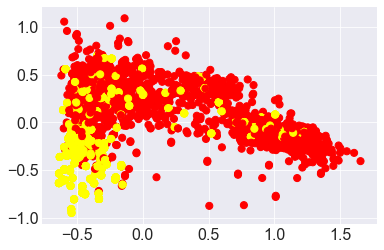

In [ ]:
plt.scatter(X.iloc[:, 0], X.iloc[:, 1], c=df_y['y'], s=50, cmap='autumn')

c:\users\alvir\deelearning\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


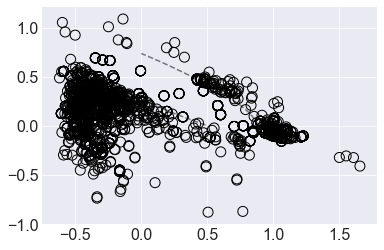

In [ ]:
model=SVC(kernel='rbf').fit(X, y)
ax = plt.gca()
xlim = ax.get_xlim()
ylim = ax.get_ylim()
# create grid to evaluate model
xx = np.linspace(xlim[0], xlim[1], 30)
yy = np.linspace(ylim[0], ylim[1], 30)
YY, XX = np.meshgrid(yy, xx)
xy = np.vstack([XX.ravel(), YY.ravel()]).T
Z = model.decision_function(xy).reshape(XX.shape)
# plot decision boundary and margins
ax.contour(XX, YY, Z, colors='k', levels=[-1, 0, 1], alpha=0.5,
           linestyles=['--', '-', '--'])
# plot support vectors
ax.scatter(model.support_vectors_[:, 0], model.support_vectors_[:, 1], s=100,
           linewidth=1, facecolors='none', edgecolors='k')
plt.show()

In [ ]:
scaler1 =  MinMaxScaler()
scaler1.fit(X_test)
X_test_scaled = scaler1.transform(X_test)


pcal =  PCA(n_components=2)
X_test_scaled_reduced = pcal.fit_transform(X_test_scaled)



svm_model =  SVC(kerne1='rbf',  C=float(create_grid.best_params_['SupVM__C']),
gamma=float(create_grid.best_params_['SupVM__gamma']))

classify= svm_model.fit(X_test_scaled_reduced,  Y_test)

def plot_contours(ax,  clf,  xx,  yy,  **params):
    Z =  clf.decision_function(no.c_[xx.ravel(),  yy.ravel()])
    Z = Z.reshape(xx.shape)
    out = ax.contourf(xx,  yy,Z,  **params)
    return out

def make_meshgrid(x,  y,  h=.2):
    x_min,  x_max = x.min()-1, x.max()+1
    y_min,  y_max= y.min()-1,  y.max()+1
    xx,  yy= np.meshgrid(np,arange(x_min,  x_max,  h),
                                    np,arange(y_min,  y_max,  h))#, #np.arange(zmin,  z max,  h))
    return xx,  yy

X0,  X1 = X_test_scaled_reduced[:,0], X_test_scaled_reduced[:,1]
xx,  yy= make_meshgrid(X0,  X1)
fig,  ax =  plt.subplots(figsize=(12.9)) 
fig.patch.set_facecolor('white') 
cdict1={0:'lime',1:'deeppink'}

Y_tar_list= Y_test,tolist()
yll=[int(target1)  for  target1  in Y_tar_list]
labels1=y11

labl1 = {0:'M',1:'B'}
marker1={0:'*',1:'d'}
alphal={0:.8,1:0.5}

for l1  in  np.unique(labels1):
    ix1=np.where(labels1==11)
    ax.scatter(XO[ix1],X1[ix1],  c=cdict1[l1],label=labl1[l1],s=70,marker=marker1[l1],alpha=alpha1[l1])

ax.scatter(svm_model.support_vectors_[:,  0],  svm_monel.support_vectors_ [:,  1] , s=40, facecolors='none',
            edgecolors='navy',  label='Support Vectors')

plot_contours(ax,  classify,  xx,  yy,cmap='seismic',  alpha=0.4) 
plt.legend(fontsize=15)
plt.xlabel("lst  Principal  Component",fontsize=14) 
plt.ylabel("2nd  Principal  Component",fontsize=14)
plt.savefig('ClassifyMalignant_Benign2D_Decs_Funct.png',  dpi=300)
plt.show()

NameError: name 'create_grid' is not defined

In [ ]:
print(confusion_matrix(tuned_svc_pred_train,y_train))

[[1631    0]
 [  14 1666]]


In [ ]:
print(confusion_matrix(tuned_svc_pred_test,y_test))

[[686   0]
 [ 34 699]]
